## Project 4 - Bayesian Calculations

**Exercise 1:**

Create a Bayesian Regression class that takes a log posteriori, data points, number of walkers, etc as initilization and provides all required methods and attributes required for Bayesian Regression Problems. The class should also be able to provide an integration method that allows you to integrate with respect to the posteriori distribution. Additionally, the class should allow to calculate all probabilities including the predictive distribution. Also include methods for visualization such as corner maps. Even though this class is part of a project you should consider it as your first self build Data Science tool. 

**Exercise 2:**

The data below is in the form (x,t) and represents the height x of the tide at a specific location over the course of a day. Time is represented by the variable t. Build a Bayesian Regression Model using your class from Exercise 1. Show us what your new class can do!
* Start by describing the data. What type of functional behavior do you anticipate? 
* Use your model to make a prediction about the future. 
* Create a corner plot.
* What can you say about the variance of your model parameters and what does that mean?

*Bonus!!* 
* What is the probability that the tide is higher than 15 during a day.
* What is the probability that the tide is lower than 5 during a day.

In [97]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
import emcee
%matplotlib inline


data = [(12.676817787115283, 4.840968499185621),
 (3.0635215093963133, 3.14922059397124),
 (8.9357879700357667, 5.431164887988198),
 (13.150389074317657, 0.2734372074578954),
 (12.925121692101902, 5.02106046462978),
 (10.269853674176913, 3.7776881451798454),
 (8.5618490817719284, 1.7531496843623315),
 (11.652310665546354, 0.13740741237008774),
 (15.785676964359141, 0.1589401373556326),
 (10.709910995988764, 1.405806821770987),
 (7.1341191045745171, 5.791539306670335),
 (21.883583042704814, 5.375575646320319),
 (9.3509495831601566, 1.5283167578387404),
 (8.9421204746670746, 1.2943521169392636),
 (7.9107785943448947, 2.41326855106268),
 (6.6761875778137583, 5.605375440538395),
 (11.650996974527924, 4.935997586415922),
 (17.290020321649969, 5.274010438371379),
 (13.06634684581484, 0.2347909715055829),
 (9.2602800850011402, 1.9716673533870746),
 (13.919837953941261, 5.528598466510076),
 (7.9171739378319606, 5.84750784658713),
 (12.864499776009934, 0.8278490177929644),
 (10.571617689971236, 2.36723797633488),
 (15.697626403745566, 6.217581078023053),
 (6.9542139194365262, 3.1860455750181425),
 (13.120156492593505, 4.864593354788696),
 (11.454973850882114, 1.8798442605946453),
 (10.614021877252608, 0.8044135861997307),
 (7.568300166951679, 2.673290291826998),
 (10.183500038106194, 1.309623551484031),
 (13.503996786942462, 0.04020573153381622),
 (14.908454853041013, 5.049774593191907),
 (16.502324161297746, 5.406433813862234),
 (7.7831240000772652, 5.45198929005635),
 (2.7144705188261025, 4.10012261788714),
 (6.3268913726889187, 5.6611505113173575),
 (9.343465517423013, 3.2971190116581632),
 (10.029091959312348, 0.5986208146884879),
 (12.078957723820951, 0.3853462849024228),
 (12.542705834818268, 1.5820979005652125),
 (9.8489274946698337, 2.6735253975153426),
 (11.349497927312719, 1.1055955472925354),
 (11.06556939865615, 2.5611692213120962),
 (11.242786106546351, 0.6500902431293415),
 (7.5720317139333542, 3.4428084142928075),
 (10.19301456907124, 2.427329872753534),
 (11.688185995125892, 0.14941531339444405),
 (13.321217017544326, 4.226862591173392),
 (9.2226853401109601, 2.3990630763955374),
 (7.0737562512314449, 0.8821159241146929),
 (5.5158907409668556, 2.287657630597947),
 (5.2424711689478309, 3.4418528431658317),
 (11.826235109408199, 3.3038133315910185),
 (6.2478202112864949, 3.7493402648869223),
 (7.2776616254733053, 2.666108760536187),
 (14.728663233221567, 5.923646379789856),
 (11.088563226667782, 2.974838497958867),
 (11.458847468046265, 1.2931851555147837),
 (4.0709653063610656, 2.4390760560779694),
 (15.530850378396899, 0.7685325485891545),
 (11.615168564683962, 2.7271570577326223),
 (10.632288760396049, 5.37570954124343),
 (6.9102179020649883, 1.9530381191410195),
 (7.1344237045084675, 1.6373486764522571),
 (2.4211573415830188, 2.810112760589519),
 (7.6108111175276107, 4.181915055702122),
 (9.6538205198090434, 4.444382820070389),
 (8.1905132263562983, 3.0534156042900285),
 (7.4546566492388493, 5.388475797989607),
 (14.087818085722649, 4.961727257154151),
 (7.2780971375915371, 2.54178907740794),
 (13.49355600611988, 2.493864649506947),
 (7.1166182479555999, 3.0195450895358524),
 (13.861336288014931, 6.246482002469356),
 (9.9498449141955589, 1.5817110088866608),
 (12.090250168282912, 3.990269038499848),
 (14.0111497595614, 0.9108297343631235),
 (9.3928518482934216, 3.3950553805254793),
 (8.2709147406350212, 3.214121983305056),
 (8.386404092046515, 2.1119573572471135),
 (6.9673744914092852, 2.2083135342567983),
 (9.5162641851488523, 3.2184133097802943),
 (17.967580316152478, 3.965622119805391),
 (15.832368008468372, 0.828357131652206),
 (5.3317615928107358, 2.6644501925548774),
 (5.8971983697046877, 3.0341229253117494),
 (17.963906775041007, 6.0469989006758444),
 (5.6300726881847361, 2.4077579346402826),
 (11.348534324413565, 3.8699231013565725),
 (10.028167958705753, 1.9397974132848168),
 (14.062219131934697, 4.41603067403343),
 (9.10707255345568, 0.8011371320017451),
 (10.567716164156263, 4.450436137829604),
 (10.928830310193101, 4.839816330906595),
 (11.681478622619728, 0.8572196990559613),
 (11.538949263967641, 5.760338188965996),
 (10.978084516398958, 4.49756314191279),
 (12.818751132975834, 4.411544813273495),
 (6.7181748281785731, 5.484421751460473)]

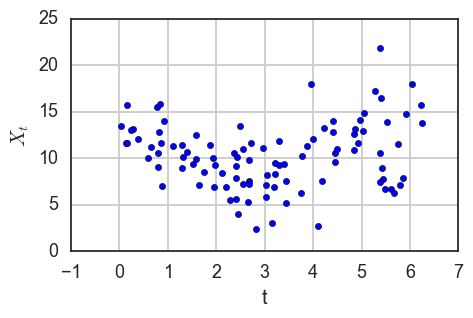

In [98]:
X = sum([x[1] for x in data])
T = sum([x[0] for x in data])
X2 = sum([x[1]**2 for x in data])
T2 = sum([x[0]**2 for x in data])
XT = sum([x[1]*x[0] for x in data])
N = len(data)


# Plotting of data points

X = [x[0] for x in data]
T = [x[1] for x in data]
fig, ax = plt.subplots(1,1, figsize = (5,3))
ax.scatter(T,X)
ax.set_xlabel('t')
ax.set_ylabel('$X_t$')
ax.grid()



In [99]:
# From observing this graph visually, in addition to the fact that waves move in a somewhat
# periodic pace, it appears observationally that you need a periodic function. 
# Hence, the best function would be some extension of the sine/cosine function.
# Based on online research to establish an educated prior, a combination of
# the normal and log normal distributions are used for the prior. The mean comes from 
# the tidal theory (it's taken as a given for purposes of this
# analysis).


#w0 represents the distance from zero to the center
#w1 represents the amplitude. 
#w2 The frequency with which the sine function oscillates 
#w3 The phase shift represents the 2pi period of the sin function.
#w4 Represents the error tolerance in the likelihood function.
#w5 This represents the noise parameter.


mean_T = 1.9328859060402686  # actual diurnal frequency based on research
var_T = 0.04
logn_mean = 1 # amplitude parameter
logn_var = 1

def lnprior(x):
    w0, w1, w2, w3, w4, w5 = x
    if 7 < w0 < 25 and  w1 > 0 and -np.pi < w3 < np.pi and w4 > 0 and w5 > 0.5:
        return - (0.5 * (mean_T - w2) ** 2) / var_T - 0.5 * np.log(2 * np.pi * var_T) - \
                  0.5 * ((logn_mean - np.log(w1)) ** 2) / logn_var - 0.5 * np.log(2 * np.pi * logn_var)
    return -np.inf

In [100]:
import time

# The sinemodel represents a component of the likelihood model combined with the normal distribution
# into which it is passed to. The log likelihood of the standard distribution is the exponent in
# the normal distribution that is added to the prior (due to log addition rules).
# An initial position is setup for each parameter and the equation for each parameter was 
# determined on an experimental basis by trial and error of running the Monte Carlo simulation
# multiple times and trying to adjust the parameters to get a better fit.



def sinemodel(theta, t):
    return theta[0] + theta[1] * np.sin(theta[2] * t + theta[3]) + np.random.normal(0, theta[5])

def lnlike(theta):
    return -0.5*theta[4]*np.sum([(e[0] - sinemodel(theta, e[1]))**2 for e in data]) + 0.5*N*np.log(theta[4])

def lnprob(theta):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta)
    
nwalkers = 100
ndim = 6
p0 = 10 * np.random.rand(nwalkers) + 7
p1 = 4 * np.random.rand(nwalkers) + 3
p2 = np.random.rand(nwalkers) + 1.5
p3 = 2 * np.pi * np.random.rand(nwalkers) - np.pi
p4 = 3 * np.random.rand(nwalkers)
p5 = 4 * np.random.rand(nwalkers) + 0.5
pos0 = np.empty((nwalkers, ndim))
pos0[:, 0] = p0
pos0[:, 1] = p1
pos0[:, 2] = p2
pos0[:, 3] = p3
pos0[:, 4] = p4
pos0[:, 5] = p5
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
print "sampler done setting up"
t1 = time.time()
pos, prob, state = sampler.run_mcmc(pos0, 2000)
t2 = time.time()
print "done with burn in!"
print "(took {:} seconds)".format(str(t2 - t1))
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 10000)
t3 = time.time()
print "got the full chain!"
print "(took {:} seconds)".format(str(t3 - t2))
samples = sampler.flatchain

sampler done setting up
done with burn in!
(took 78.7161340714 seconds)
got the full chain!
(took 385.501182079 seconds)


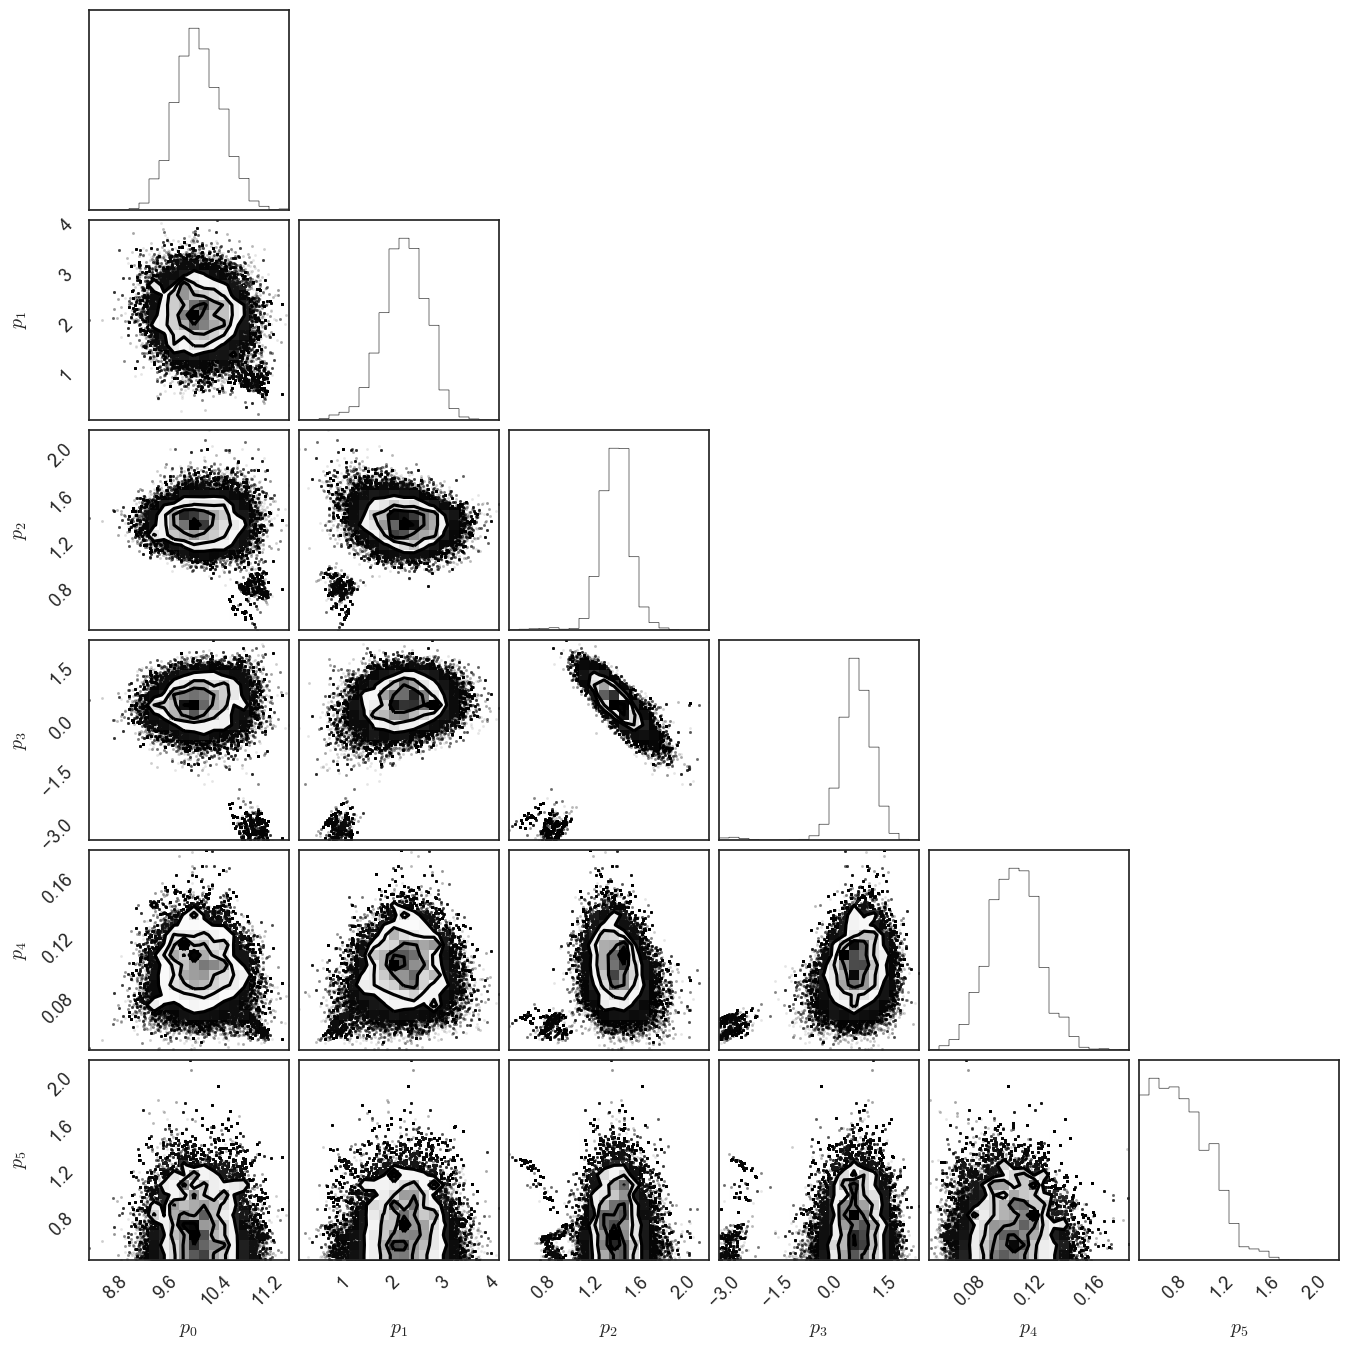

In [95]:
# Imports the plots for all the parameters.
import corner
fig = corner.corner(samples, labels=["$p_0$", "$p_1$", "$p_2$", "$p_3$", "$p_4$", "$p_5$"])
fig.savefig("triangle.png")

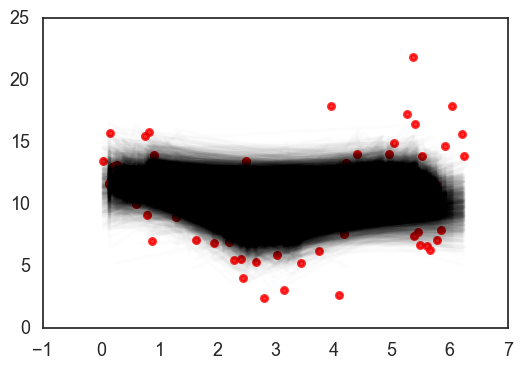

In [96]:
#Each set of data points represented in black is created at the same times as the provided
#data using the parameter values sampled from the posterior of the MCMC.


import matplotlib.pyplot as pl
ts = [e[1] for e in data]
for theta in samples[np.random.randint(len(samples), size=500)]:
    ys = [sinemodel(theta, e[1]) for e in data]
    pl.plot(ts, ys, color="k", alpha=0.01)
tru_ys = [e[0] for e in data]
pl.scatter(ts, tru_ys, color="r", lw=2, alpha=0.8)

In [119]:
# This represents the means of all the parameter values.
def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

omega0 = MonteCarlo(lambda x: x[0], samples)
omega1 = MonteCarlo(lambda x: x[1], samples)
omega2 = MonteCarlo(lambda x: x[2], samples)
omega3 = MonteCarlo(lambda x: x[3], samples)
omega4 = MonteCarlo(lambda x: x[4], samples)
omega5 = MonteCarlo(lambda x: x[5], samples)
print ('o0 = {0}, o1 = {1}, o2 = {2}, o3 = {3}, o4 = {4}, o5 = {5}'.\
format(omega0, omega1,omega2, omega3, omega4, omega5))

o0 = 10.1429330027, o1 = 2.20860954575, o2 = 1.4209005181, o3 = 0.750590352884, o4 = 0.107824038275, o5 = 0.867088755416


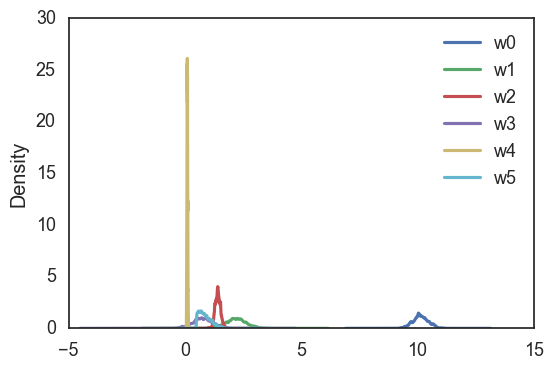

In [115]:
import pandas as pd
data = pd.DataFrame(samples, columns =['w0', 'w1', 'w2', 'w3', 'w4', 'w5'])
data.plot(kind = 'density')

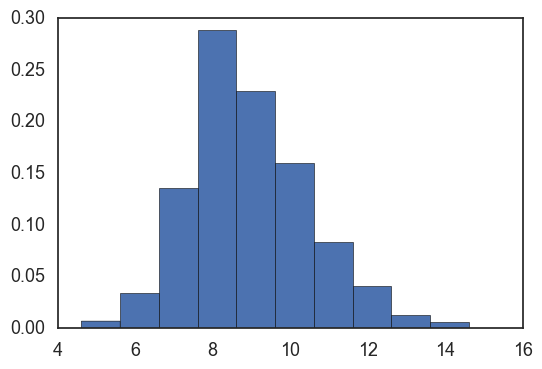

In [101]:
# This represents the distribution of heigths for a given time, in this case we picked 
# the distribution of heights at 12 hours (the independent axis represents the heights and 
# dependent axis represents their associated probabilities for time = 12)
def predict_height(time):
    ys = []
    for theta in samples[np.random.randint(len(samples), size=1000)]:
        ys.append(sinemodel(theta, time))    
    pl.hist(ys, normed=True)

predict_height(12)
        